In [1]:
# Importing the libraries

import torch
from torch import nn         
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Creating data

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias

X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [3]:
# Splitting the data into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    train_size = 0.8)

In [4]:
# Checking the length and shape of splits

len(X_train), len(y_train), len(X_test), len(y_test), X_train.shape, y_train.shape, X_test.shape, y_test.shape

(40,
 40,
 10,
 10,
 torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

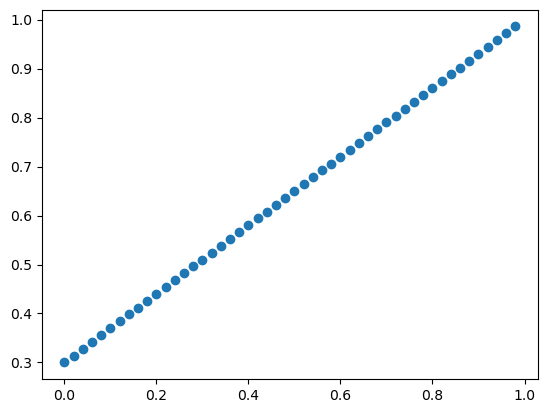

In [5]:
# Visualising the dataset

plt.scatter(X,y)

In [6]:
# Creating the refression model

class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad = True,
                                               dtype = torch.float32))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad = True,
                                             dtype = torch.float32))
    
    def forward(self, X: torch.Tensor) -> torch.Tensor: 
        return self.weights*X + self.bias 

In [7]:
# Initialising the model

model_0 = LinearRegressionModel()

In [8]:
# Checking model state before training

model_0.state_dict()

OrderedDict([('weights', tensor([0.1833])), ('bias', tensor([-0.5524]))])

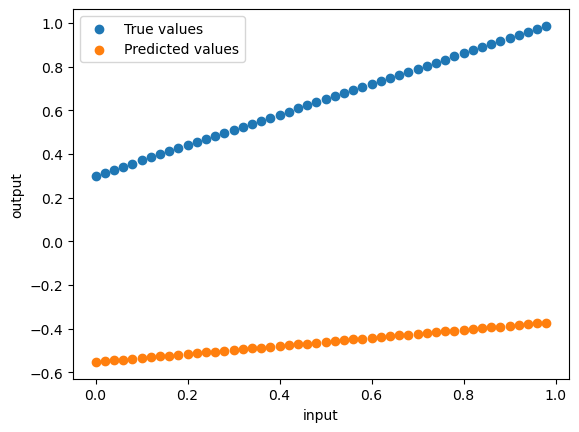

In [9]:
# Visualzising the untrained model's predicitions
y_preds_prev = model_0(X)

with torch.inference_mode():
    plt.scatter(X,y)
    plt.scatter(X,y_preds_prev)
    plt.xlabel('input')
    plt.ylabel('output')
    plt.legend(['True values','Predicted values'])

In [10]:
# Create and set loss function and optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [11]:
# Create training loop

epochs = 1000

for epoch in range(epochs):
    model_0.train()
    
    y_preds = model_0(X_train)
    loss = loss_fn(y_preds, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0.eval()
    with torch.inference_mode():
        test_loss = model_0(X_test)
        test_loss = loss_fn(test_loss, y_test)
        
    if epoch%100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.5f}, Test_loss: {test_loss:.5f}")

Epoch: 0, Loss: 1.09758, Test_loss: 1.12500
Epoch: 100, Loss: 0.01627, Test_loss: 0.01687
Epoch: 200, Loss: 0.00977, Test_loss: 0.00258
Epoch: 300, Loss: 0.00977, Test_loss: 0.00258
Epoch: 400, Loss: 0.00977, Test_loss: 0.00258
Epoch: 500, Loss: 0.00977, Test_loss: 0.00258
Epoch: 600, Loss: 0.00977, Test_loss: 0.00258
Epoch: 700, Loss: 0.00977, Test_loss: 0.00258
Epoch: 800, Loss: 0.00977, Test_loss: 0.00258
Epoch: 900, Loss: 0.00977, Test_loss: 0.00258


In [12]:
# Checking model state after training

model_0.state_dict()

OrderedDict([('weights', tensor([0.7036])), ('bias', tensor([0.3081]))])

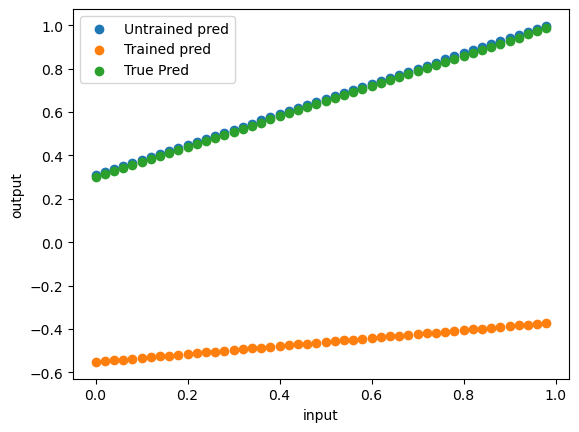

In [14]:
# Visualzising the trained model's predicitions
y_preds = model_0(X)

with torch.inference_mode():
    plt.scatter(X,y_preds)
    plt.scatter(X,y_preds_prev)
    plt.scatter(X,y)
    plt.xlabel('input')
    plt.ylabel('output')
    plt.legend(['Untrained pred','Trained pred','True Pred'])
    